In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models 
import potential_sweeps as sweep
import plotting

%matplotlib widget

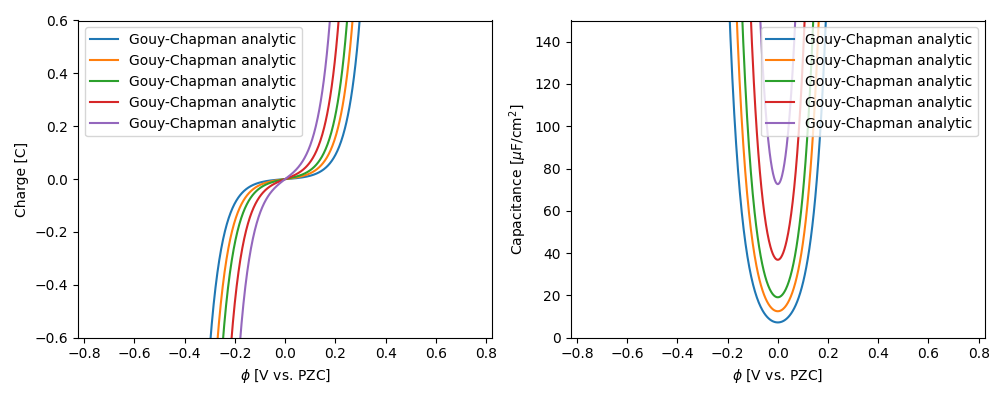

In [2]:
potentials = np.linspace(-0.75, 0.75, 100)

x_list = [0, 2, 6, 25, 100]
sol_list = []

for x in x_list:
    sol = sweep.gouy_chapman(1e-3 + x*1e-3, np.linspace(potentials[0], potentials[-1], 1000))    
    sol_list.append(sol)

fig, ax = plotting.plot_potential_sweep(sol_list)

plt.show()

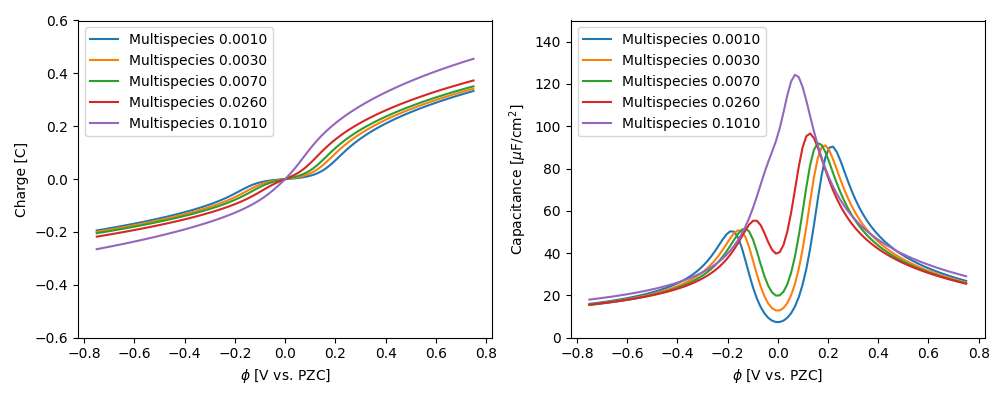

In [3]:
potentials = np.linspace(-0.75, 0.75, 100)
water = models.Solvent(2.75e-10, r'H$_2$O')

x_list = [0, 2, 6, 25, 100]
sol_list = []

for x in x_list:
    H = models.Species(1e-3, 15e-10, +1, r'H$^+$')
    Na = models.Species(x * 1e-3, 15e-10, +1, r'Na$^+$')
    ClO4 = models.Species(1e-3 + x * 1e-3, 10e-10, -1, r'ClO$_4^-$')
    species_list = [H, ClO4, Na]

    multi = models.Multispecies(species_list, water, eps_r_opt=1)
    sol = sweep.numerical(multi, potentials, force_recalculation=False)
    
    sol_list.append(sol)

fig, ax = plotting.plot_potential_sweep(sol_list)

plt.show()

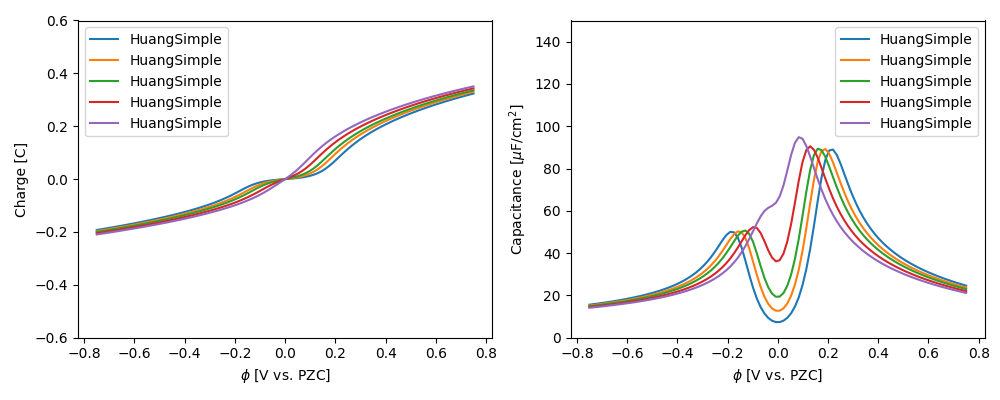

In [4]:
potentials = np.linspace(-0.75, 0.75, 100)

x_list = [0, 2, 6, 25, 100]
sol_list = []

for x in x_list:
    simple = models.HuangSimple(1e-3 + x*1e-3, 15e-10, 10e-10, 1)
    sol = sweep.numerical(simple, potentials, force_recalculation=False)
    
    sol_list.append(sol)

fig, ax = plotting.plot_potential_sweep(sol_list)

plt.show()